<a href="https://colab.research.google.com/github/bishram-acharya/hitachi_solution/blob/main/hitachi_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚡ Hitachi Technergy: Energy Forecasting
In this notebook, we're going to predict the demand and price of energy for 7 days.

## 1. Problem Statement :
- Predict the demand of energy given its weather/environment data
- Predict the price of energy give past date data(hourly)

## 2. Data :
The data has been provided by Hitachi energy itself. There are three main datasets :
- Demand Forecasting Demand Data upto Feb 21.csv, which provides the hourly demand in MW.
- Demand Forecasting Weather Data upto Feb 28.csv, which provides hourly values of input features(independent variables).
- Price Forecasting data upto December 24.csv, which provides hourly values of energy prices

## 3. Features :
- Temperature: Represents the air temperature at a specific location.

- Feels Like: Describes the perceived temperature by factoring in wind and humidity.

- Dewpoint: Indicates the temperature at which air becomes saturated, leading to dew formation.

- Humidity: Measures the amount of water vapor in the air, expressed as a percentage.

- Precipitation: Quantifies the amount of rain or snowfall in a specific period, measured in millimeters.

- Precipitation Probability: Represents the likelihood of precipitation occurring, expressed as a percentage.

- Precipitation Type: Identifies the type of precipitation, such as rain, snow, sleet, etc.

- Snowfall: Measures the amount of snowfall in a specific period, measured in millimeters.

- Snow Depth: Indicates the depth of accumulated snow on the ground, measured in centimeters.

- Wind Gust: Represents the maximum wind speed observed during a specific period, measured in meters per second.

- Wind Speed: Describes the average wind speed at a specific location, measured in meters per second.

- Wind Direction: Indicates the direction from which the wind is blowing, measured in degrees.

- Sea Level Pressure: Represents the atmospheric pressure at sea level, measured in hectopascals (hPa).

- Cloud Cover: Describes the fraction of the sky covered by clouds, expressed as a percentage.

- Visibility: Indicates the distance at which objects can be clearly seen, measured in kilometers.

- Solar Radiation: Represents the amount of solar energy received per unit area, measured in watts per square meter (W/m^2).

- UV Index: Measures the strength of ultraviolet (UV) radiation.

- Severe Risk: Represents the level of risk associated natural calamities.

- Conditions: Describes the overall weather conditions at a specific location.

## 4. Expected Output:
7 days forecast given the input features for demand and prices given past data






In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

## Exploratory Data Analysis

### Reading Data and simple insights

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Importing Data with weather features
df=pd.read_csv('/content/drive//My Drive/Documents and Data for forecasting LOCUS/Demand Forecasting/Demand Forecasting Weather Data upto Feb 28.csv')
df_demand=pd.read_csv('/content/drive//My Drive/Documents and Data for forecasting LOCUS/Demand Forecasting/Demand Forecasting Demand Data upto Feb 21.csv')

In [ ]:
df.head()

,Name,datetime,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,...,visibility,solarradiation,uvindex,severerisk,conditions,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Pokhara,1/1/2020 0:00,38.0,34.4,29.0,69.76,0.0,0,NaN,0.0,...,9.9,0.0,0,NaN,Overcast,NaN,NaN,NaN,NaN,NaN
1,Pokhara,1/1/2020 1:00,38.0,34.4,29.9,72.37,0.0,0,NaN,0.0,...,9.9,0.0,0,NaN,Overcast,NaN,NaN,NaN,NaN,NaN
2,Pokhara,1/1/2020 2:00,38.0,35.7,30.8,75.06,0.0,0,NaN,0.0,...,9.9,0.0,0,NaN,Overcast,NaN,NaN,NaN,NaN,NaN
3,Pokhara,1/1/2020 3:00,37.1,33.4,29.9,74.97,0.0,0,NaN,0.0,...,9.9,0.0,0,NaN,Partially cloudy,NaN,NaN,NaN,NaN,NaN
4,Pokhara,1/1/2020 4:00,35.1,32.3,29.0,78.41,0.0,0,NaN,0.0,...,9.9,0.0,0,NaN,Clear,NaN,NaN,NaN,NaN,NaN


In [ ]:
# It seems that there are some unnecessary headerless columns. Dropping headerless columns that came with data:
df.drop(columns=['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27720 entries, 0 to 27719
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              27720 non-null  object 
 1   datetime          27720 non-null  object 
 2   Temperature       27720 non-null  float64
 3   feelslike         27720 non-null  float64
 4   dewpoint          27720 non-null  float64
 5   humidity          27720 non-null  float64
 6   precipitation     27720 non-null  float64
 7   precipprob        27720 non-null  int64  
 8   preciptype        2751 non-null   object 
 9   snow              27702 non-null  float64
 10  snowdepth         27702 non-null  float64
 11  windgust          12223 non-null  float64
 12  windspeed         27720 non-null  float64
 13  winddirection     27720 non-null  float64
 14  sealevelpressure  27702 non-null  float64
 15  cloudcover        27720 non-null  float64
 16  visibility        27702 non-null  float6

In [ ]:
# Finding out the count of null values in each feature columns
df.isna().sum()

Name                    0
datetime                0
Temperature             0
feelslike               0
dewpoint                0
humidity                0
precipitation           0
precipprob              0
preciptype          24969
snow                   18
snowdepth              18
windgust            15497
windspeed               0
winddirection           0
sealevelpressure       18
cloudcover              0
visibility             18
solarradiation          0
uvindex                 0
severerisk          17766
conditions              0
dtype: int64

### Parsing Date and time
When we work with time series data, we want to enrich the time & date component as much as possible. We can do that by telling pandas which of our columns has dates in it using the parse_dates parameter.

In [ ]:
df['datetime']=pd.to_datetime(df['datetime'])

In [ ]:
print(df['datetime'].dtype)

datetime64[ns]


#### Now the datetime column is of data type datetime64

### Summary Statistics

In [ ]:
df.describe()

,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,snow,snowdepth,windgust,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk
count,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27702.000000,27702.000000,12223.000000,27720.000000,27720.000000,27702.000000,27720.000000,27702.000000,27720.000000,27720.000000,9954.000000
mean,56.846847,55.505018,45.486089,68.485757,0.005618,6.908369,0.001205,0.044258,15.449611,6.499069,158.488175,1018.008913,39.796815,9.183842,163.639946,1.614430,13.055957
std,18.734390,21.558142,18.198644,18.189507,0.044799,25.360098,0.041213,0.377761,8.627404,4.765840,120.235734,6.702345,44.949277,1.902787,265.417780,2.662525,13.499753
min,-5.900000,-30.100000,-14.900000,17.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,991.400000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,42.200000,38.000000,29.900000,55.172500,0.000000,0.000000,0.000000,0.000000,8.300000,3.400000,30.000000,1013.900000,0.000000,9.900000,0.000000,0.000000,10.000000
50%,56.900000,56.900000,46.100000,70.540000,0.000000,0.000000,0.000000,0.000000,14.300000,5.800000,180.000000,1017.500000,0.000000,9.900000,12.000000,0.000000,10.000000
75%,72.000000,72.000000,62.100000,83.960000,0.000000,0.000000,0.000000,0.000000,21.900000,9.200000,260.000000,1022.300000,100.000000,9.900000,222.000000,2.000000,10.000000
max,99.000000,110.400000,79.100000,100.000000,2.376000,100.000000,4.700000,5.780000,57.500000,38.000000,360.000000,1041.500000,100.000000,34.900000,1197.000000,10.000000,100.000000


In [ ]:
demand=df_demand['Demand (MW)']

In [ ]:
df['Demand(MW)']=demand

In [ ]:
df.set_index('datetime', inplace=True)
df.head()

,Name,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,snowdepth,...,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions,Demand(MW)
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,Pokhara,38.0,34.4,29.0,69.76,0.0,0,NaN,0.0,0.0,...,4.7,220.0,1015.4,100.0,9.9,0.0,0,NaN,Overcast,445.8
2020-01-01 01:00:00,Pokhara,38.0,34.4,29.9,72.37,0.0,0,NaN,0.0,0.0,...,4.7,230.0,1015.3,100.0,9.9,0.0,0,NaN,Overcast,424.5
2020-01-01 02:00:00,Pokhara,38.0,35.7,30.8,75.06,0.0,0,NaN,0.0,0.0,...,3.4,230.0,1015.4,100.0,9.9,0.0,0,NaN,Overcast,423.5
2020-01-01 03:00:00,Pokhara,37.1,33.4,29.9,74.97,0.0,0,NaN,0.0,0.0,...,4.7,220.0,1015.3,88.9,9.9,0.0,0,NaN,Partially cloudy,418.8
2020-01-01 04:00:00,Pokhara,35.1,32.3,29.0,78.41,0.0,0,NaN,0.0,0.0,...,3.4,240.0,1015.2,0.0,9.9,0.0,0,NaN,Clear,414.8


In [ ]:
df_demand['datetime']=pd.to_datetime(df_demand['datetime'])
df_demand.set_index('datetime',inplace=True)


In [ ]:
df_demand.columns

Index(['Demand (MW)'], dtype='object')

In [ ]:
df_demand_copy=df_demand.copy()



In [ ]:
df_demand_copy["hour"]=df_demand.index.hour
df_demand_copy['day']=df_demand.index.day
df_demand_copy['month']=df_demand.index.month
df_demand_copy['year']=df_demand.index.year


In [ ]:
df_demand_copy.head()

,Demand (MW),hour,day,month,year
datetime,,,,,
2020-01-01 00:00:00,445.8,0,1,1,2020
2020-01-01 01:00:00,424.5,1,1,1,2020
2020-01-01 02:00:00,423.5,2,1,1,2020
2020-01-01 03:00:00,418.8,3,1,1,2020
2020-01-01 04:00:00,414.8,4,1,1,2020


In [ ]:
df_scatter_day=df_demand_copy[(df_demand_copy['day']==1) & (df_demand_copy['year']==2020) & (df_demand_copy['month']==1)]

In [ ]:
df_scatter_day.reset_index(inplace=True)

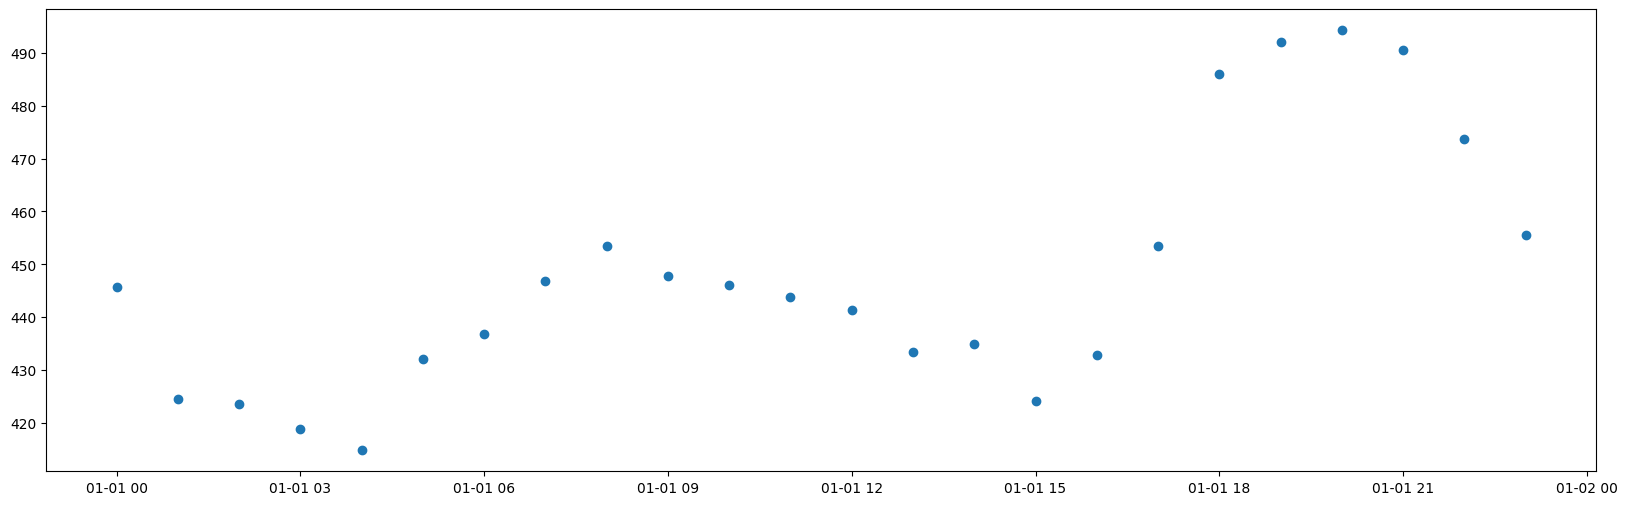

In [ ]:

plt.figure(figsize=(20,6))
plt.scatter(df_scatter_day['datetime'],df_scatter_day['Demand (MW)'])

In [ ]:
df_demand_copy.reset_index(inplace=True)

In [ ]:
df_demand_copy .head()

,Demand (MW),hour,day,month,year
0,445.8,0,1,1,2020
1,424.5,1,1,1,2020
2,423.5,2,1,1,2020
3,418.8,3,1,1,2020
4,414.8,4,1,1,2020


In [ ]:
df_demand_copy_1=df_demand_copy.groupby(['year','month','day'])['Demand (MW)'].mean()


In [ ]:
df_demand_copy_1

year  month  day
2020  1      1      447.787500
             2      523.025000
             3      518.770833
             4      506.100000
             5      491.412500
                       ...    
2023  2      17     556.016667
             18     484.712500
             19     415.495833
             20     457.445833
             21     474.950000
Name: Demand (MW), Length: 1148, dtype: float64

In [ ]:
df_bar=df_demand_copy_1.unstack()

In [ ]:
df_bar.head()

day                 1           2           3           4           5   \
year month                                                               
2020 1      447.787500  523.025000  518.770833  506.100000  491.412500   
     2      490.508333  465.941667  503.004167  512.895833  569.900000   
     3      458.858333  495.512500  504.187500  518.991667  520.033333   
     4      434.620833  428.937500  406.716667  369.062500  372.158333   
     5      406.712500  412.975000  419.495833  432.254167  419.383333   

day                 6           7           8           9           10  ...  \
year month                                                              ...   
2020 1      540.670833  551.441667  540.120833  532.958333  498.170833  ...   
     2      590.562500  584.541667  520.125000  502.266667  530.229167  ...   
     3      535.887500  489.516667  463.916667  504.412500  510.683333  ...   
     4      414.500000  450.870833  499.979167  407.387500  384.275000  ...   
     5      410.283333  408.462500  394.204167  370.091667  354.437500  ...   

day                 22          23          24          25          26  \
year month                                                               
2020 1      613.579167  574.391667  547.995833  527.962500  476.141667   
     2      514.887500  468.958333  524.366667  533.516667  568.808333   
     3      465.583333  466.833333  483.033333  474.358333  467.362500   
     4      502.775000  497.500000  474.608333  411.112500  378.420833   
     5      490.112500  502.145833  497.529167  546.654167  595.129167   

day                 27          28          29          30          31  
year month                                                              
2020 1      557.658333  579.887500  570.487500  565.875000  546.695833  
     2      565.233333  532.766667  495.454167         NaN         NaN  
     3      464.925000  454.433333  407.120833  431.670833  434.108333  
     4      420.112500  420.295833  419.887500  413.358333         NaN  
     5      525.104167  569.275000  528.854167  441.650000  426.950000  

[5 rows x 31 columns]

<Axes: xlabel='year,month'>

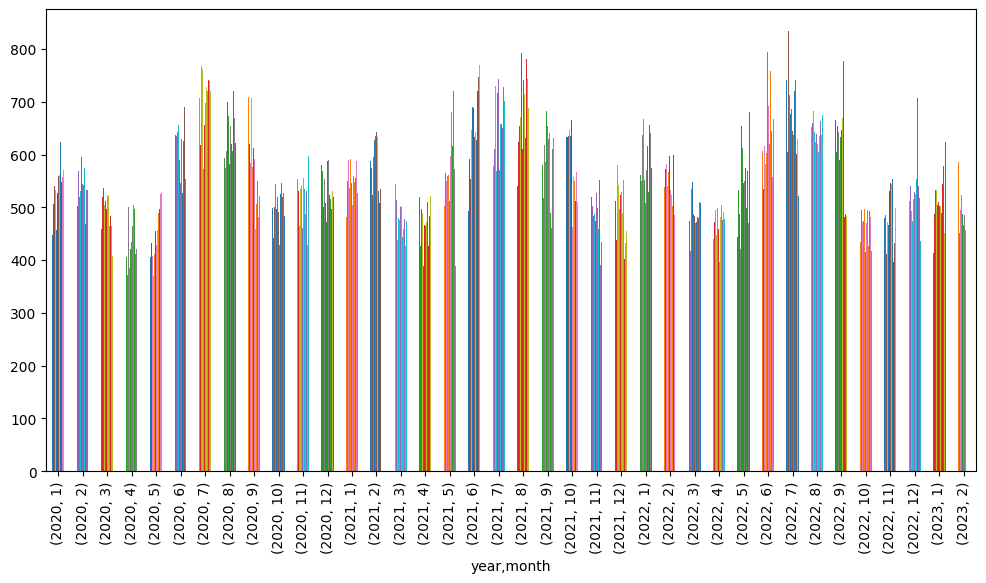

In [150]:
df_bar.plot.bar(figsize=(12,6),legend=False)

In [ ]:
df.columns

Index(['Demand (MW)'], dtype='object')

In [ ]:
df=df[:27552]

In [ ]:
df.head()

,Name,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,snowdepth,...,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions,Demand(MW)
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,Pokhara,38.0,34.4,29.0,69.76,0.0,0,NaN,0.0,0.0,...,4.7,220.0,1015.4,100.0,9.9,0.0,0,NaN,Overcast,445.8
2020-01-01 01:00:00,Pokhara,38.0,34.4,29.9,72.37,0.0,0,NaN,0.0,0.0,...,4.7,230.0,1015.3,100.0,9.9,0.0,0,NaN,Overcast,424.5
2020-01-01 02:00:00,Pokhara,38.0,35.7,30.8,75.06,0.0,0,NaN,0.0,0.0,...,3.4,230.0,1015.4,100.0,9.9,0.0,0,NaN,Overcast,423.5
2020-01-01 03:00:00,Pokhara,37.1,33.4,29.9,74.97,0.0,0,NaN,0.0,0.0,...,4.7,220.0,1015.3,88.9,9.9,0.0,0,NaN,Partially cloudy,418.8
2020-01-01 04:00:00,Pokhara,35.1,32.3,29.0,78.41,0.0,0,NaN,0.0,0.0,...,3.4,240.0,1015.2,0.0,9.9,0.0,0,NaN,Clear,414.8


In [151]:
correlations=[]
column_names=[]
for column_name in df.columns:
  if (df[column_name].dtype == 'float64') and (df[column_name].isna().sum()<=100 and column_name!='Demand(MW)') :
    correlation = df[column_name].corr(df['Demand(MW)'])
    correlations.append(correlation)
    column_names.append(column_name)
    print(f'{column_name}:{correlation}\n')

Temperature:0.44820260948487933

feelslike:0.4370061215167046

dewpoint:0.3630003358919944

humidity:-0.1871422045037993

precipitation:-0.011423298647801719

snow:0.015335090919222936

snowdepth:0.05362643712625413

windspeed:0.0487012652576177

winddirection:0.043991490051914786

sealevelpressure:-0.037037758587015114

cloudcover:-0.07416354728168802

visibility:0.08785313261932683

solarradiation:0.31111787450327083



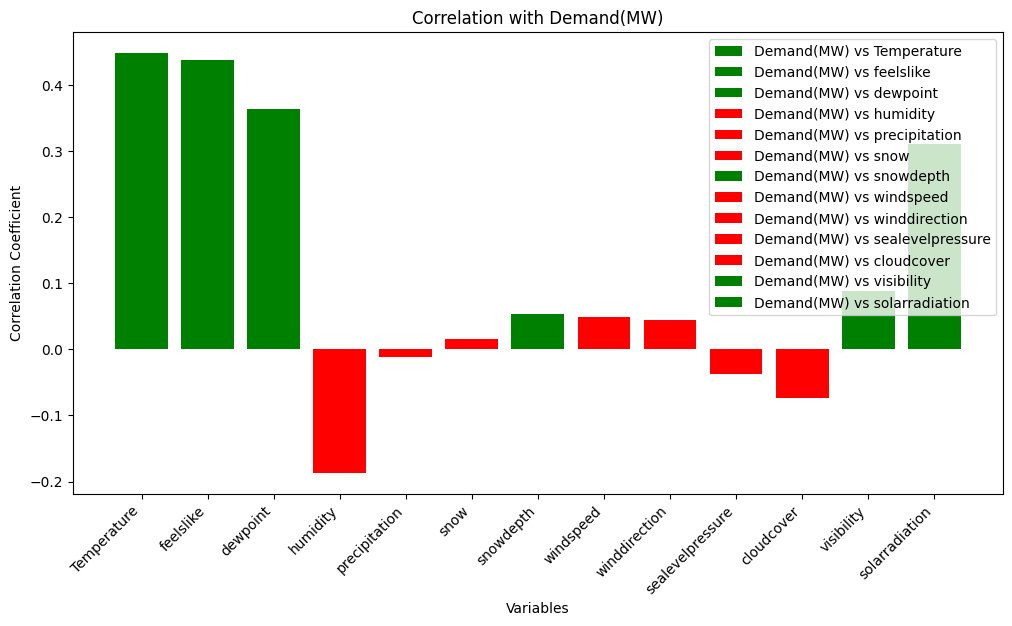

In [158]:
bar_colors = ['red' if correlation < abs(0.05) else 'green' for correlation in correlations]

# Plot the bar chart with color coding
plt.figure(figsize=(12, 6))
bars = plt.bar(column_names, correlations, color=bar_colors)
plt.title('Correlation with Demand(MW)')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')

# Add legend and change its position
plt.legend(bars, [f'Demand(MW) vs {column}' for column in column_names], loc='upper right')

plt.show()

In [ ]:
column_names = [column_name for column_name in df.columns if (df[column_name].dtype == 'float64')
                                                        and (df[column_name].isna().sum() <= 100)
                                                        and (column_name != 'Demand(MW)')]
column_names

['Temperature',
 'feelslike',
 'dewpoint',
 'humidity',
 'precipitation',
 'snow',
 'snowdepth',
 'windspeed',
 'winddirection',
 'sealevelpressure',
 'cloudcover',
 'visibility',
 'solarradiation']

In [ ]:
# Anmol Update
df_scatter_day=df_demand_copy[:24]

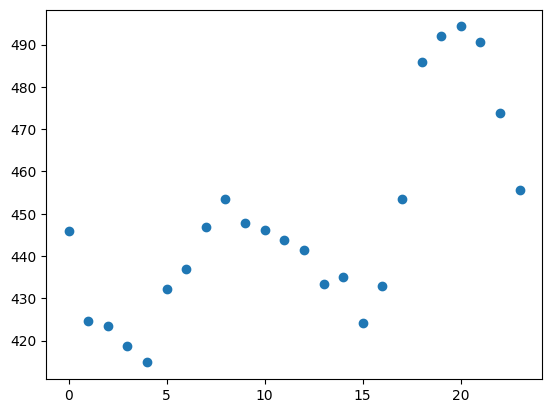

In [ ]:
plt.scatter(df_scatter_day['hour'],df_scatter_day['Demand (MW)'])

In [ ]:
df_demand_month=df_demand_copy.groupby(['year','month','day'])['Demand (MW)'].mean()[:30].reset_index()


In [ ]:
df_demand_month.head()

,year,month,day,Demand (MW)
0,2020,1,1,447.787500
1,2020,1,2,523.025000
2,2020,1,3,518.770833
3,2020,1,4,506.100000
4,2020,1,5,491.412500


In [ ]:
df_demand_month.shape

(30, 4)

([<matplotlib.axis.XTick at 0x7841a5d48970>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30')])

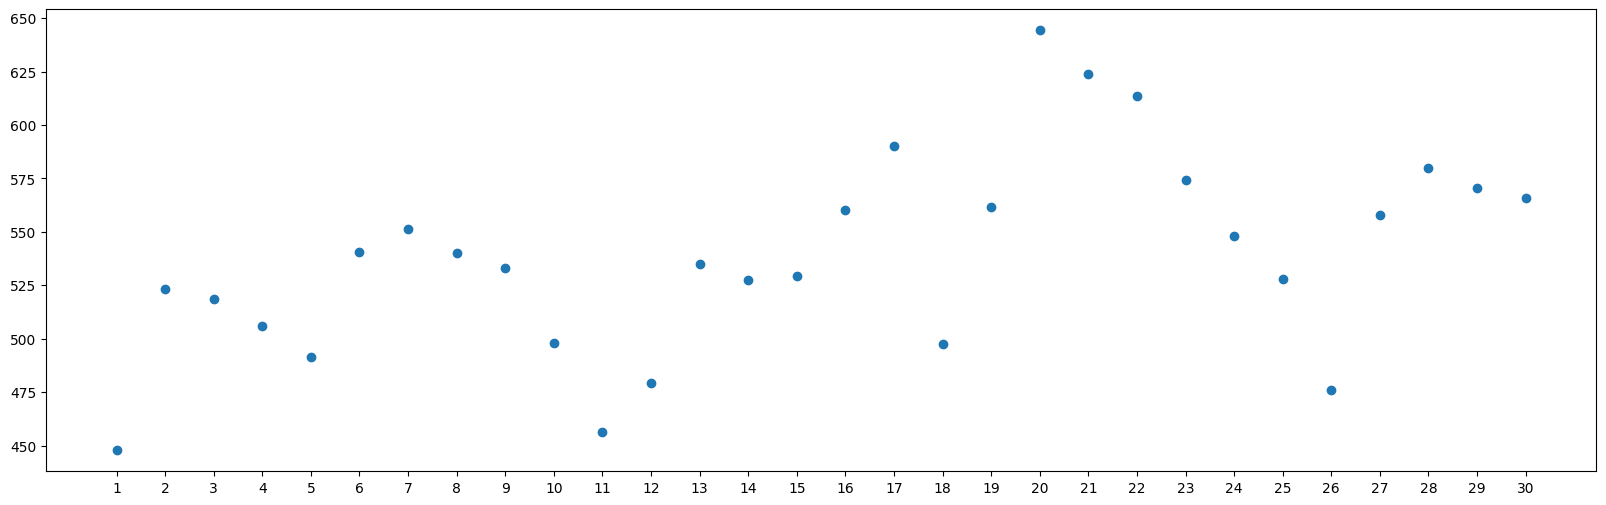

In [ ]:
plt.figure(figsize=(20,6))
plt.scatter(df_demand_month['day'],df_demand_month['Demand (MW)'])
plt.xticks(df_demand_month['day'])

In [ ]:
df_demand_year=df_demand_copy.groupby(['year','month'])['Demand (MW)'].mean().reset_index()

In [ ]:
df_demand_year.head(38)
df_demand_year.loc[35:38]['year']

35    2022
36    2023
37    2023
Name: year, dtype: int64

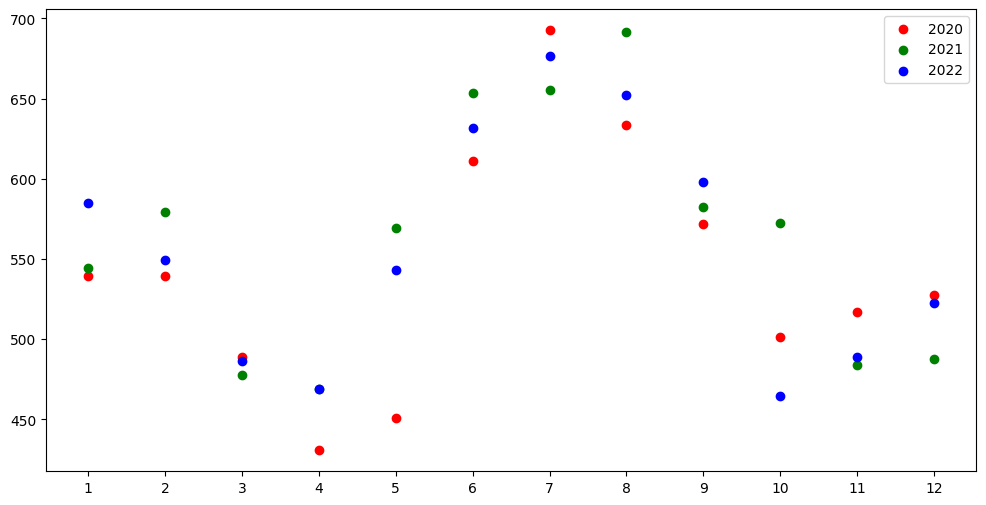

In [ ]:
colors=['r','g','b']
demand_values=[df_demand_year.loc[:11]['Demand (MW)'],df_demand_year.loc[12:23]['Demand (MW)'],df_demand_year.loc[24:35]['Demand (MW)']]
labels = ['2020', '2021', '2022']
plt.figure(figsize=(12,6))

for i in range(3):
    x_values = list(range(1, 13))
    plt.scatter(x_values, demand_values[i], c=colors[i], label=labels[i])
plt.xticks(range(1,13))
plt.legend()

In [ ]:
df_demand_copy.reset_index(inplace=True)


In [ ]:
df_demand_copy.head()


,index,Demand (MW),hour,day,month,year
0,0,445.8,0,1,1,2020
1,1,424.5,1,1,1,2020
2,2,423.5,2,1,1,2020
3,3,418.8,3,1,1,2020
4,4,414.8,4,1,1,2020


In [148]:
# # check for weekend
# from datetime import datetime

# def is_weekend(date_str):
#     # Convert the date string to a datetime object
#     date_obj = datetime.strptime(date_str, '%Y-%m-%d')

#     # Check if the day of the week is Saturday (5) or Sunday (6)
#     return date_obj.weekday() in [5, 6]

# # Example usage
# date_to_check = '2024-01-21'  # Replace with your date in 'YYYY-MM-DD' format
# if is_weekend(date_to_check):
#     print(f'{date_to_check} is a weekend.')
# else:
#     print(f'{date_to_check} is not a weekend.')

2024-01-21 is a weekend.
